In [1]:
import sys

In [131]:
reload(Simulation)

<module 'Simulation' from '../../source/Simulation.py'>

In [2]:
sys.path.append('../../source/')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [7]:
import seaborn as sns

/Users/haosutang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [8]:
sns.set_style(style='darkgrid')

Exploratory Data Analysis

In [5]:
from Hedge import Hedge

Initialize an Hedge instance within which stock data are stored.

In [ ]:
hedge = Hedge('../../data/all_stocks.csv','../../data/spy.csv', begindate='2014-01-01', enddate='2014-12-31')

In [14]:
hedge.portfolio = ['FLIR', 'IVC', 'KNDI', 'MHO', 'EVC', 'PCO', 'COWN', 'NILE', 'MIW',
       'ANAC', 'ADHD', 'PLBC', 'ESXB', 'JRO', 'WES', 'HURC', 'MQT', 'EROS',
       'RPAI', 'HMNF']
hedge.market = ['GPX', 'GRMN', 'MPWR', 'ENR', 'CTHR', 'PRFZ', 'SUMR', 'CUBE',
       'ACTS', 'ANF', 'MYI', 'SON', 'SSL', 'PW', 'KT', 'TWN', 'IPWR',
       'AAN', 'CASH', 'DISCA', 'RFP', 'HPS', 'WMB', 'VRSN', 'ETN', 'WPZ',
       'RAI', 'BOXC', 'ARCI', 'EMN', 'LMOS', 'EXPD', 'NQS', 'GB', 'KNOP',
       'CNL', 'ENDP', 'SPSC', 'SCVL', 'EPAY']

Plotting the market data - or SPY (SPDR S&P 500 ETF Trust)

In [43]:
import pandas as pd

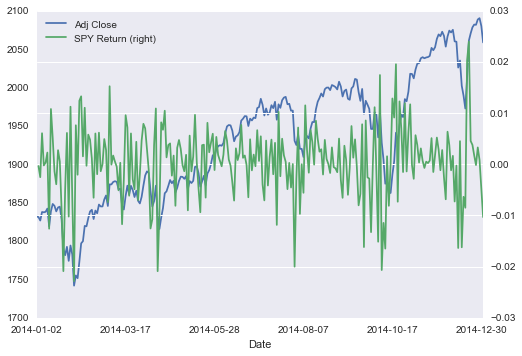

In [64]:
spydf = pd.DataFrame(hedge.spy.copy())
spydf.rename(columns={'Adj Close': 'SPY'})
spydf['SPY Return'] = spydf.pct_change()
spydf.plot(secondary_y='SPY Return')
plt.xlabel('Date')
plt.savefig('./Figures/0404/SPY.png')

Plot portfolio data.

In [59]:
portdf = pd.DataFrame([hedge.dollar_portfolio_sum, hedge.dollar_market_sum_ret]).transpose()
portdf.columns = ['Portfolio Dollar Value', 'Portfolio Return']
portdf.plot(secondary_y='Portfolio Return')
plt.xlabel('Date')
plt.savefig('./Figures/0404/Port.png')

Plot Initial Market

In [106]:
hedge.market = ['GPX', 'GRMN', 'MPWR', 'ENR', 'CTHR', 'PRFZ', 'SUMR', 'CUBE',
       'ACTS', 'ANF', 'MYI', 'SON', 'SSL', 'PW', 'KT', 'TWN', 'IPWR',
       'AAN', 'CASH', 'DISCA', 'RFP', 'HPS', 'WMB', 'VRSN', 'ETN', 'WPZ',
       'RAI', 'BOXC', 'ARCI', 'EMN', 'LMOS', 'EXPD', 'NQS', 'GB', 'KNOP',
       'CNL', 'ENDP', 'SPSC', 'SCVL', 'EPAY']

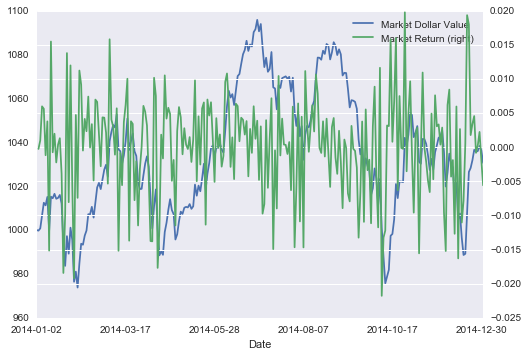

In [67]:
marketdf = pd.DataFrame([hedge.dollar_market_sum, hedge.dollar_market_sum_ret]).transpose()
marketdf.columns = ['Market Dollar Value', 'Market Return']
marketdf.plot(secondary_y='Market Return')
plt.xlabel('Date')
plt.savefig('./Figures/0404/Initial_market.png')

---
Simulated annealing

In [12]:
import Simulation
from energy_functions import *

In [74]:
from BetaUtils import get_beta, beta_hedging_ret, cum_ret

In [157]:
hedge.market = ['GPX', 'GRMN', 'MPWR', 'ENR', 'CTHR', 'PRFZ', 'SUMR', 'CUBE',
       'ACTS', 'ANF', 'MYI', 'SON', 'SSL', 'PW', 'KT', 'TWN', 'IPWR',
       'AAN', 'CASH', 'DISCA', 'RFP', 'HPS', 'WMB', 'VRSN', 'ETN', 'WPZ',
       'RAI', 'BOXC', 'ARCI', 'EMN', 'LMOS', 'EXPD', 'NQS', 'GB', 'KNOP',
       'CNL', 'ENDP', 'SPSC', 'SCVL', 'EPAY']
st_sharpe, bm_sharpe = Simulation.simulated_annealing(hedge, 
                                                      init_temp=0.02, 
                                                      min_temp=0.001, 
                                                      cool_by=0.9, 
                                                      reanneal=10, 
                                                      num_iter=300, 
                                                      energy_func=neg_sharpe)

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290


In [158]:
st_sharpe_300, bm_sharpe_300 = st_sharpe, bm_sharpe

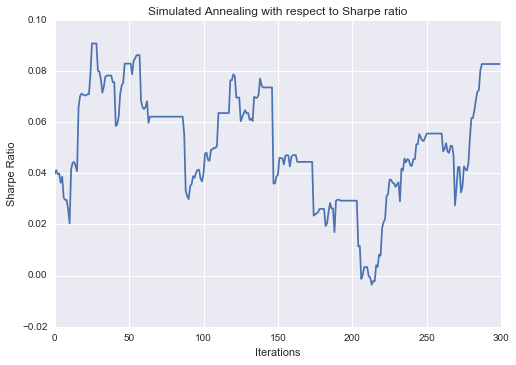

In [159]:
plt.plot(-st_sharpe)
plt.xlabel('Iterations')
plt.ylabel('Sharpe Ratio')
plt.title('Simulated Annealing with respect to Sharpe ratio')
plt.savefig('./Figures/0404/Sharpe_sim.png')

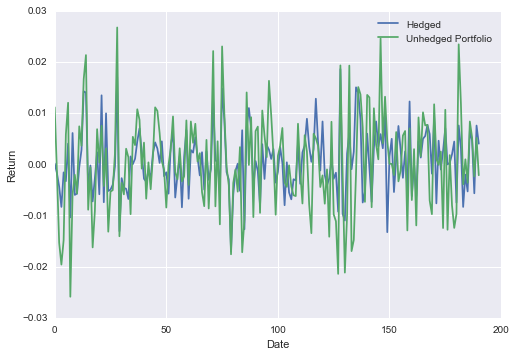

In [160]:
hedge.market = bm_sharpe

_, betas = get_beta(hedge.dollar_portfolio_sum_ret, hedge.dollar_market_sum_ret)
bhr = beta_hedging_ret(betas[1:], hedge.dollar_portfolio_sum_ret[61:], hedge.dollar_market_sum_ret[61:])

_, betas_sp = get_beta(hedge.dollar_portfolio_sum_ret, hedge.spy.pct_change())
bhr_sp = beta_hedging_ret(betas[1:], hedge.dollar_portfolio_sum_ret[61:], hedge.spy.pct_change()[61:])

plt.plot(bhr, label = 'Hedged')
plt.plot(hedge.dollar_portfolio_sum_ret[61:].values, label = 'Unhedged Portfolio')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.savefig('./Figures/0404/Sharpe_Ret.png')

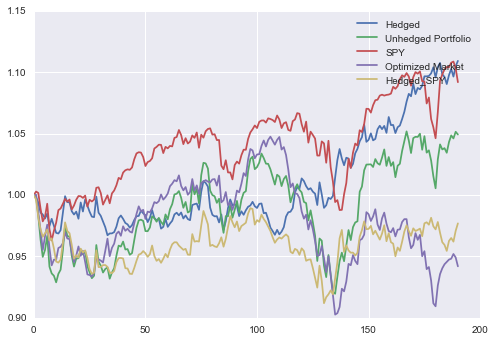

In [161]:
plt.plot(cum_ret(bhr), label = 'Hedged')
plt.plot(cum_ret(hedge.dollar_portfolio_sum_ret[61:].values), label = 'Unhedged Portfolio')
plt.plot(cum_ret(hedge.spy.pct_change()[61:].values), label = 'SPY')
plt.plot(cum_ret(hedge.dollar_market_sum_ret[61:].values), label = 'Optimized Market')
plt.plot(cum_ret(bhr_sp), label = 'Hedged_SPY')
plt.legend()
plt.savefig('./Figures/0404/Sharpe_cum_ret.png')

In [162]:
print 'Hedged Sharpe:', -neg_sharpe((bhr))
print 'Hedged against SPY Sharpe:', -neg_sharpe(bhr_sp)
print 'Unhedged Sharpe:', -neg_sharpe(hedge.dollar_portfolio_sum_ret[61:])
print 'Optimized Market Sharpe:', -neg_sharpe(hedge.dollar_market_sum_ret[61:])
print 'SPY sharpe:', -neg_sharpe(hedge.spy.pct_change()[61:])

Hedged Sharpe: 0.0906834586095
Hedged against SPY Sharpe: -0.00947765081067
Unhedged Sharpe: 0.0373867130098
Optimized Market Sharpe: -0.0250908615553
SPY sharpe: 0.0742325161969
